<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Laboratorios/Laboratorio_01_pandas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>




# Laboratorio 1.0:

## Series de tiempo

El siguiente [dataset](https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv) contiene información del precio del eur/usd  desde el 05/07/2022/ hasta el 12/05/2023 con periodicidad de una hora. El data frame contiene el precio de apertura, cierrre, valor más bajo cotizado, valor más alto cotizado, volumen, spread etc. Para este dataset, realizar lo siguiente:


1. Leer el dataset desde el github.
2. Definir como indice la columna time.
3. Obtenga información del data frame.

4. Determine si hay null, nan en el data frame.

5. Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.  

6. Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:
- Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.
- Para la nueva columna construya un histograma de los datos.
- Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:


https://pypi.org/project/fitter/

```python


from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data,
           distributions=['gamma',
                          'lognorm',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
#Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
#Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

```

Con el metodo get_distributions(), podemos ver todas las distribuciones estadisticas de la libreria. Ajusta a la mejor.  Puede consultar [esta](https://medium.com/the-researchers-guide/finding-the-best-distribution-that-fits-your-data-using-pythons-fitter-library-319a5a0972e9)  página si desea ver un ejemplo.


7. Para el data frame, seleccionemos solo los datos del 2023.

8. El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes

```python
  df.groupby(pd.Grouper(key='time', freq='15D')).mean()
```

9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes.  Para ello puedo emplear el metodo groupby. Notetese que si no  realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

```python
q=df.groupby(pd.Grouper(key='time', freq='15D'))

for name, group in q:
  print(name, group)
```


# Analisando el dataset

In [112]:
# Librerías necesarias
!pip install fitter
import pandas as pd
import matplotlib.pyplot as plt

#1. **Leer el dataset desde el github.**

In [113]:
path = "https://raw.githubusercontent.com/hernansalinas/Curso_aprendizaje_estadistico/main/datasets/Pandas_data_historical_dataEURUSD.csv"
df = pd.read_csv(path)
df

,Unnamed: 0,time,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
0,0,2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
1,1,2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2,2,2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
3,3,2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
4,4,2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
4996,4996,2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
4997,4997,2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075
4998,4998,2023-05-12 22:00:00,1.08531,1.08549,1.08506,1.08518,1374,8,0,1.085245,-0.00013,-0.00015,-0.000140


#2. **Definir como indice la columna time.**

In [114]:
df.index = pd.to_datetime(df.time)   # Para poder operar con los tiempos

In [115]:
df = df.drop(columns=['Unnamed: 0', 'time'])
df

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
time,,,,,,,,,,,
2022-07-25 13:00:00,1.02427,1.02430,1.02145,1.02345,3927,8,0,1.023860,-0.00046,-0.00082,-0.000640
2022-07-25 14:00:00,1.02345,1.02578,1.02288,1.02299,5344,8,0,1.023220,-0.00046,-0.00082,-0.000640
2022-07-25 15:00:00,1.02303,1.02476,1.02230,1.02457,5524,8,0,1.023800,0.00158,-0.00042,0.000580
2022-07-25 16:00:00,1.02454,1.02548,1.02355,1.02485,5234,8,0,1.024695,0.00028,0.00151,0.000895
2022-07-25 17:00:00,1.02485,1.02514,1.02030,1.02181,9031,7,0,1.023330,-0.00304,0.00031,-0.001365
...,...,...,...,...,...,...,...,...,...,...,...
2023-05-12 19:00:00,1.08552,1.08569,1.08485,1.08514,2275,8,0,1.085330,-0.00038,-0.00071,-0.000545
2023-05-12 20:00:00,1.08516,1.08567,1.08502,1.08546,1676,8,0,1.085310,0.00032,-0.00036,-0.000020
2023-05-12 21:00:00,1.08546,1.08546,1.08487,1.08531,1828,8,0,1.085385,-0.00015,0.00030,0.000075


#3. **Obtenga información del data frame.**

In [116]:
# Información básica del dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 5000 entries, 2022-07-25 13:00:00 to 2023-05-12 23:00:00
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   open                5000 non-null   float64
 1   high                5000 non-null   float64
 2   low                 5000 non-null   float64
 3   close               5000 non-null   float64
 4   tick_volume         5000 non-null   int64  
 5   spread              5000 non-null   int64  
 6   real_volume         5000 non-null   int64  
 7   MeanCloseOpen       5000 non-null   float64
 8   Diff_Close          5000 non-null   float64
 9   Diff_Open           5000 non-null   float64
 10  Diff_MeanCloseOpen  5000 non-null   float64
dtypes: float64(8), int64(3)
memory usage: 468.8 KB


In [117]:
# Información adicional del dataset
df.describe()

,open,high,low,close,tick_volume,spread,real_volume,MeanCloseOpen,Diff_Close,Diff_Open,Diff_MeanCloseOpen
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.0,5000.000000,5000.000000,5000.000000,5000.000000
mean,1.043891,1.044815,1.042991,1.043906,3690.249400,8.981600,0.0,1.043898,0.000012,0.000012,0.000012
std,0.041135,0.040991,0.041263,0.041135,2800.488505,5.785115,0.0,0.041129,0.001400,0.001404,0.000978
min,0.953910,0.955930,0.953570,0.953910,85.000000,0.000000,0.0,0.954735,-0.013970,-0.014010,-0.007260
25%,1.002718,1.003507,1.001715,1.002705,1738.750000,8.000000,0.0,1.002648,-0.000580,-0.000600,-0.000425
50%,1.055670,1.056795,1.054960,1.055700,2999.500000,8.000000,0.0,1.055712,-0.000005,0.000000,0.000005
75%,1.078940,1.079582,1.078222,1.078947,4861.000000,8.000000,0.0,1.078955,0.000620,0.000612,0.000430
max,1.108470,1.109530,1.108050,1.108500,23708.000000,183.000000,0.0,1.108280,0.017340,0.017420,0.010780


#4. **Determine si hay null, nan en el data frame.**

In [118]:
# Observando si hay datos null
df.isnull().sum()

,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0
Diff_Open,0


In [119]:
# Observando si hay datos nan
df.isna().sum()

,0
open,0
high,0
low,0
close,0
tick_volume,0
spread,0
real_volume,0
MeanCloseOpen,0
Diff_Close,0
Diff_Open,0


#5. **Emplea la notacion Pascal Case y trabaja solo con la columa del precio de cierre del eur/usd.**

In [120]:
df = df.rename(columns={'close':'Close'})
df['Close']

,Close
time,
2022-07-25 13:00:00,1.02345
2022-07-25 14:00:00,1.02299
2022-07-25 15:00:00,1.02457
2022-07-25 16:00:00,1.02485
2022-07-25 17:00:00,1.02181
...,...
2023-05-12 19:00:00,1.08514
2023-05-12 20:00:00,1.08546
2023-05-12 21:00:00,1.08531


#6. **Ahora vamos a determinar cual es la mejor distribución estadística que se ajusta a la diferencia del precio de cierre cada hora, para ello realizamos lo siguiente:**





* Determine la diferencia de precio entre horas, agregue una nueva columna llamada DiffPrice, en este punto tu dataframe debe tener solo dos columnas Close, DiffPrice y el indice debe ser el tiempo.



In [121]:
diferencia = df.Close.diff(2)
df['DiffPrice'] = diferencia

In [122]:
df = df.iloc[::2,:]

In [123]:
df1 = df[['Close', 'DiffPrice']]
df1

,Close,DiffPrice
time,,
2022-07-25 13:00:00,1.02345,NaN
2022-07-25 15:00:00,1.02457,0.00112
2022-07-25 17:00:00,1.02181,-0.00276
2022-07-25 19:00:00,1.02211,0.00030
2022-07-25 21:00:00,1.02211,0.00000
...,...,...
2023-05-12 14:00:00,1.08919,-0.00189
2023-05-12 16:00:00,1.08811,-0.00108
2023-05-12 18:00:00,1.08552,-0.00259


In [124]:
data = df1.dropna()



* Para la nueva columna construya un histograma de los datos.



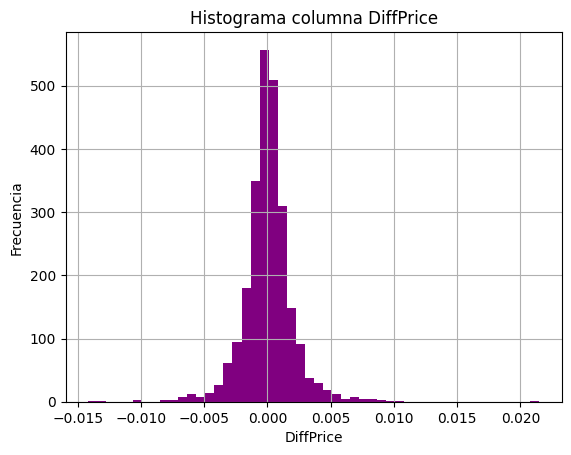

In [125]:
data['DiffPrice'].plot(kind = 'hist', bins = 50, color = 'purple')
plt.title('Histograma columna DiffPrice')
plt.xlabel('DiffPrice')
plt.ylabel('Frecuencia')
plt.grid()
plt.show()

* Determine la mejor distribucion estadística que se ajusta al histograma anterior, para ello puede emplear lo siguente:

<ipython-input-126-93f17570abce>:16: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  data.groupby(pd.Grouper(freq='2H')).mean()


,Close,DiffPrice
time,,
2022-07-25 14:00:00,1.02457,0.00112
2022-07-25 16:00:00,1.02181,-0.00276
2022-07-25 18:00:00,1.02211,0.00030
2022-07-25 20:00:00,1.02211,0.00000
2022-07-25 22:00:00,1.02211,0.00000
...,...,...
2023-05-12 14:00:00,1.08919,-0.00189
2023-05-12 16:00:00,1.08811,-0.00108
2023-05-12 18:00:00,1.08552,-0.00259


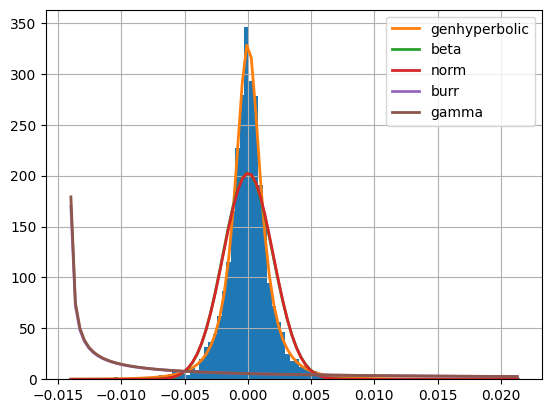

In [126]:
from fitter import Fitter, get_common_distributions, get_distributions

f = Fitter(data['DiffPrice'],
           distributions=['gamma',
                          'genhyperbolic',
                          "beta",
                          "burr",
                          "norm"])
f.fit()
f.summary()
# Indentificamos la mejor distribucion con el error cuadratico medio
f.get_best(method = 'sumsquare_error')
# Indentificamos parametros de la distrubicion beta
f.fitted_param["beta"]

data.groupby(pd.Grouper(freq='2H')).mean()

#7. **Para el data frame, seleccionemos solo los datos del 2023.**

In [127]:
df_2023 = df1[(df.index.year == 2023)]
df_2023 = df_2023.resample('2H').mean()
ClosePrice = df1['Close'].diff()
df_2023['DiffPrice'] = ClosePrice
df_2023 = df_2023.dropna()
df_2023

<ipython-input-127-417ff6d8c041>:2: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  df_2023 = df_2023.resample('2H').mean()


,Close,DiffPrice
time,,
2023-01-02 00:00:00,1.06796,-0.00264
2023-01-02 02:00:00,1.07058,0.00262
2023-01-02 04:00:00,1.06880,-0.00178
2023-01-02 06:00:00,1.06980,0.00100
2023-01-02 08:00:00,1.06819,-0.00161
...,...,...
2023-05-12 14:00:00,1.08919,-0.00189
2023-05-12 16:00:00,1.08811,-0.00108
2023-05-12 18:00:00,1.08552,-0.00259


# 8. **El comando groupby permite agrupar los datos con la periodicidad deseada: 1 dias, 2 dias, 1 mes etc. Determina el promedio con una periodicidad de 15 dias, con periodidicidad de 1 semana, y una periodicidad de 1 mes**

In [128]:
a = df_2023.groupby(pd.Grouper(freq='15D')).mean()
a

,Close,DiffPrice
time,,
2023-01-02,1.069267,0.000087
2023-01-17,1.085565,0.000039
2023-02-01,1.077713,-0.000138
2023-02-16,1.063163,-0.000068
2023-03-03,1.063253,0.000048
2023-03-18,1.083793,0.000144
2023-04-02,1.093063,0.000125
2023-04-17,1.099040,-0.000018
2023-05-02,1.098888,-0.000112


# 9. Para los datos asociados a los meses de 2023, construya un histograma para cada mes. Para ello puedo emplear el metodo groupby. Notetese que si no realiza una operación después de aplicar el metodo grouby, podrias iterar sobre dicho objeto, por ejemplo:

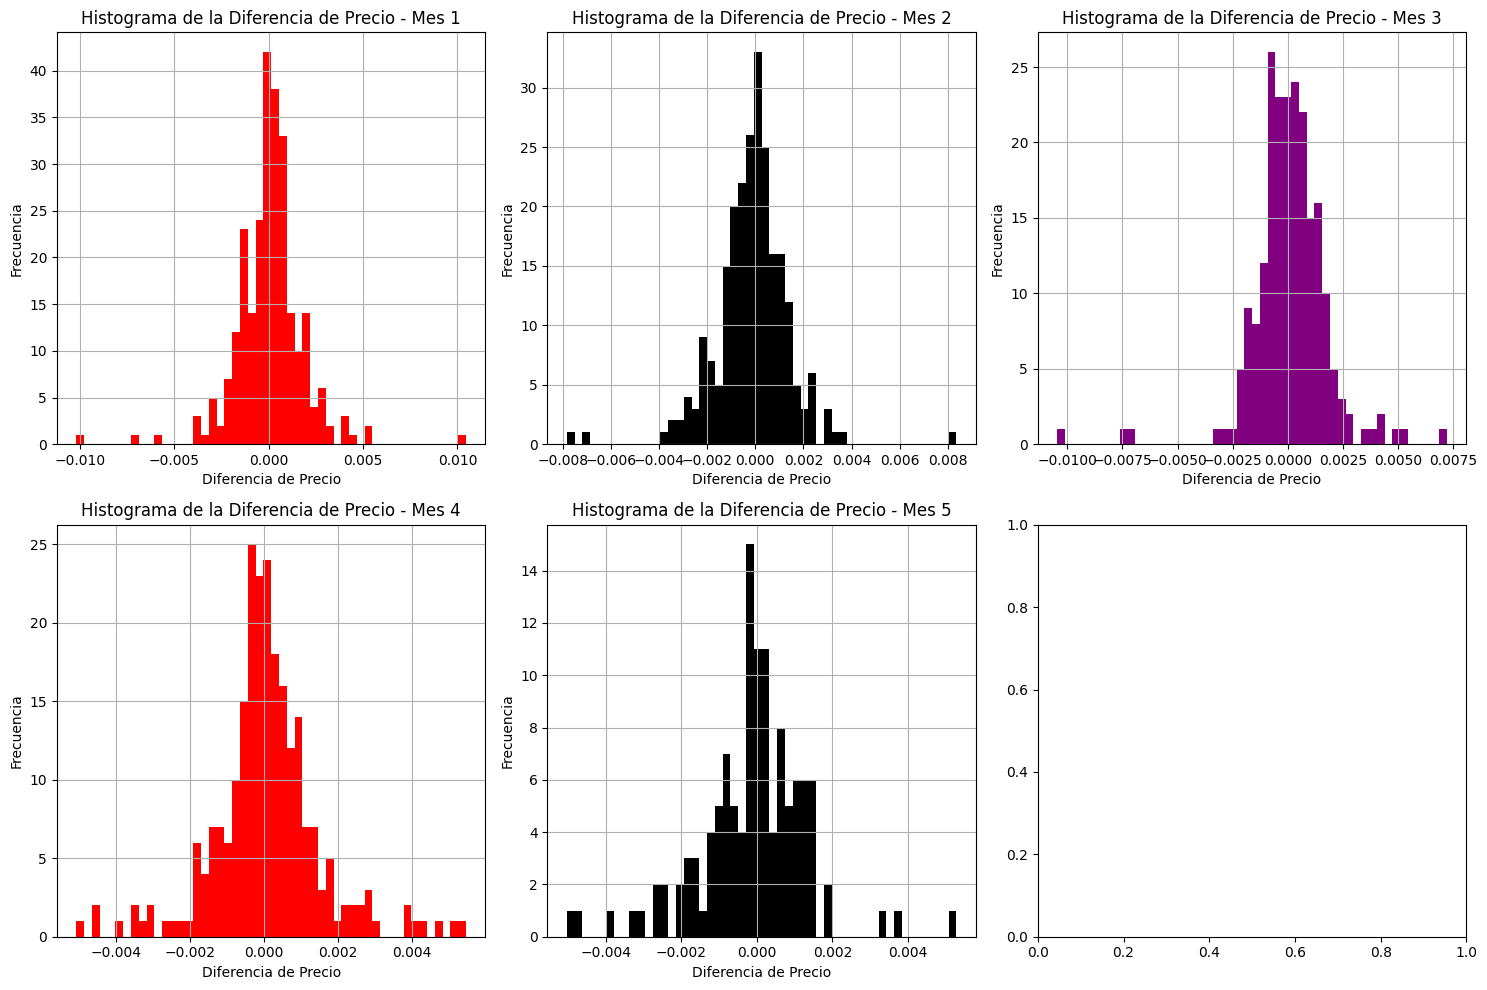

In [129]:
fig, axs = plt.subplots(2, 3, figsize=(15, 10))

grupos_mensuales = df_2023.groupby(df_2023.index.month)

colores = ['purple', 'red', 'black']

for (mes, datos), ax in zip(grupos_mensuales, axs.flat):
    color = colores[mes % len(colores)]
    ax.hist(datos['DiffPrice'], bins=50, color=color)
    ax.grid(True)
    ax.set_title(f'Histograma de la Diferencia de Precio - Mes {mes}')
    ax.set_xlabel('Diferencia de Precio')
    ax.set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()